In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv(r"C:\Users\Mritunjoy Paul\CSV files\Water_Quality_Dataset.csv")

In [24]:
# Step 1: Convert Timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

In [26]:
df["year"] = df["Timestamp"].dt.year
df["month"] = df["Timestamp"].dt.month
df["day"] = df["Timestamp"].dt.day
df["hour"] = df["Timestamp"].dt.hour

In [27]:
# Step 3: Drop original Timestamp
df = df.drop(columns=["Timestamp"])

In [28]:
# Step 4: Encode categorical column 'Location'
df = pd.get_dummies(df, columns=["Location"], drop_first=True)

In [29]:
# ✅ Final preprocessed dataset
print(df.head())
print(df.dtypes)

         pH  Turbidity (NTU)  Temperature (°C)  DO (mg/L)  BOD (mg/L)  \
0  8.762414        14.468306         16.461631   6.258335    2.478582   
1  7.477966         1.905645         27.446865   2.826120    8.048453   
2  7.938278         1.889506         34.623557   3.380191    2.102481   
3  8.728748         0.736115         18.802153   6.543794    6.714160   
4  7.975335        19.151777         30.851902   4.370861    2.114614   

   Lead (mg/L)  Mercury (mg/L)  Arsenic (mg/L)  Pollution_Level  year  month  \
0     0.002801        0.001924        0.018769                2  2024      1   
1     0.019551        0.000633        0.003708                2  2024      1   
2     0.019291        0.000205        0.005055                2  2024      1   
3     0.003358        0.001058        0.005638                2  2024      1   
4     0.006059        0.000124        0.001237                2  2024      1   

   day  hour  Location_L2  Location_L3  Location_L4  Location_L5  
0    1     0 

In [31]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
pH                  0
Turbidity (NTU)     0
Temperature (°C)    0
DO (mg/L)           0
BOD (mg/L)          0
Lead (mg/L)         0
Mercury (mg/L)      0
Arsenic (mg/L)      0
Pollution_Level     0
year                0
month               0
day                 0
hour                0
Location_L2         0
Location_L3         0
Location_L4         0
Location_L5         0
dtype: int64


In [32]:
df.head()

,pH,Turbidity (NTU),Temperature (°C),DO (mg/L),BOD (mg/L),Lead (mg/L),Mercury (mg/L),Arsenic (mg/L),Pollution_Level,year,month,day,hour,Location_L2,Location_L3,Location_L4,Location_L5
0,8.762414,14.468306,16.461631,6.258335,2.478582,0.002801,0.001924,0.018769,2,2024,1,1,0,False,False,True,False
1,7.477966,1.905645,27.446865,2.826120,8.048453,0.019551,0.000633,0.003708,2,2024,1,1,1,False,False,False,True
2,7.938278,1.889506,34.623557,3.380191,2.102481,0.019291,0.000205,0.005055,2,2024,1,1,2,False,True,False,False
3,8.728748,0.736115,18.802153,6.543794,6.714160,0.003358,0.001058,0.005638,2,2024,1,1,3,False,False,False,True
4,7.975335,19.151777,30.851902,4.370861,2.114614,0.006059,0.000124,0.001237,2,2024,1,1,4,False,False,False,True


In [33]:
# Save preprocessed file
df.to_csv("Preprocessed_Water_Quality_Main.csv", index=False)

In [34]:
X = df.drop(columns=["Pollution_Level"])
y = df["Pollution_Level"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}


📌 Logistic Regression Results:
Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.57      0.25      0.35        16
           2       0.95      0.98      0.97       183

    accuracy                           0.93       200
   macro avg       0.62      0.74      0.60       200
weighted avg       0.91      0.93      0.91       200



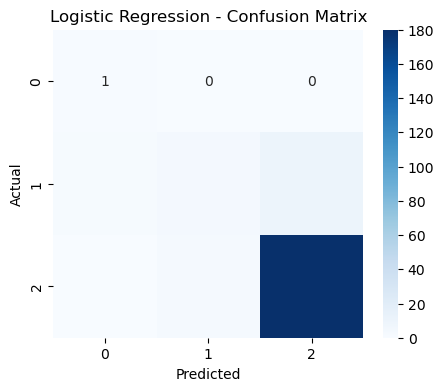


📌 Random Forest Results:
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      0.56      0.69        16
           2       0.96      1.00      0.98       183

    accuracy                           0.96       200
   macro avg       0.62      0.52      0.56       200
weighted avg       0.95      0.96      0.95       200



C:\Users\Mritunjoy Paul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mritunjoy Paul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mritunjoy Paul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


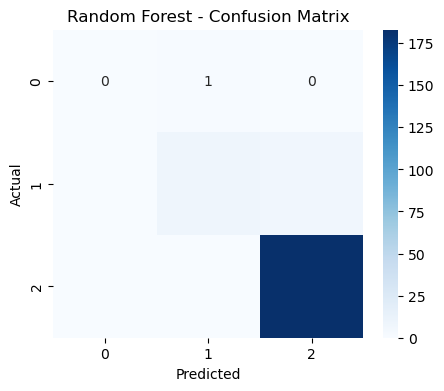

C:\Users\Mritunjoy Paul\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:01:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📌 XGBoost Results:
Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00       183

    accuracy                           0.99       200
   macro avg       0.65      0.67      0.66       200
weighted avg       0.99      0.99      0.99       200



C:\Users\Mritunjoy Paul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mritunjoy Paul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mritunjoy Paul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


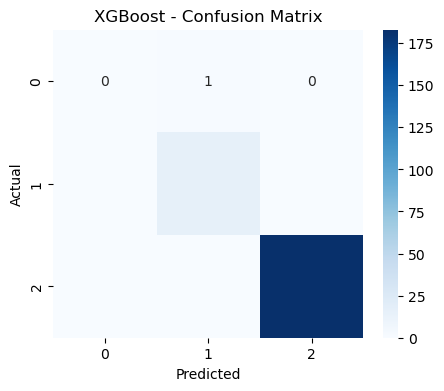

In [40]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n📌 {name} Results:")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

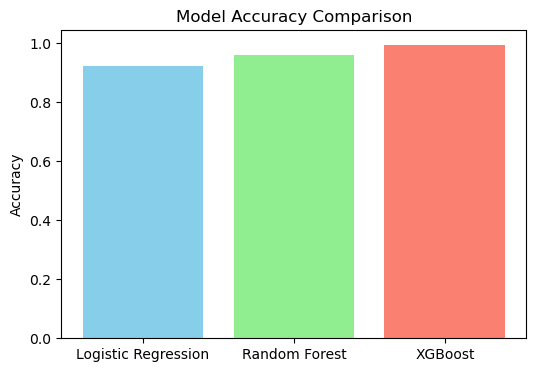

In [41]:
plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values(), color=['skyblue','lightgreen','salmon'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [43]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb.fit(X, y)

C:\Users\Mritunjoy Paul\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [44]:
importances_rf = pd.Series(rf.feature_importances_, index=df.drop(columns=["Pollution_Level"]).columns)
importances_rf = importances_rf.sort_values(ascending=False)

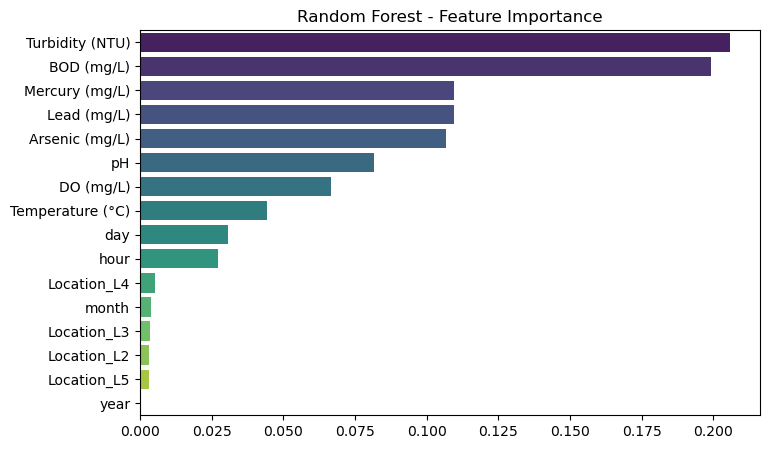

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x=importances_rf.values, y=importances_rf.index, palette="viridis")
plt.title("Random Forest - Feature Importance")
plt.show()

In [46]:
importances_xgb = pd.Series(xgb.feature_importances_, index=df.drop(columns=["Pollution_Level"]).columns)
importances_xgb = importances_xgb.sort_values(ascending=False)

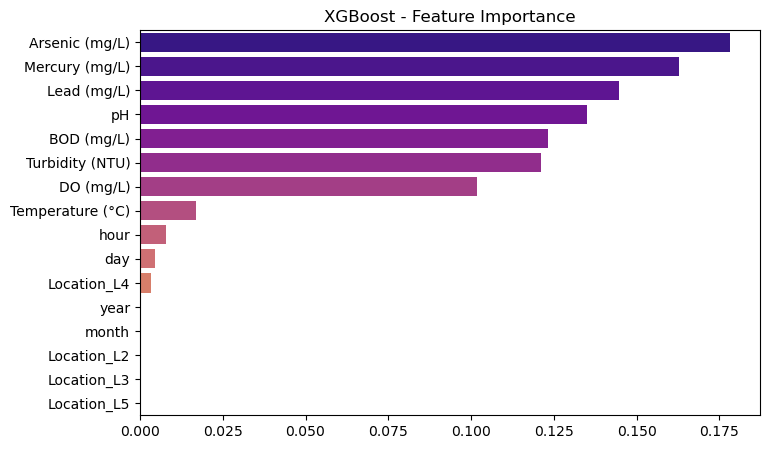

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x=importances_xgb.values, y=importances_xgb.index, palette="plasma")
plt.title("XGBoost - Feature Importance")
plt.show()